In [ ]:
!pip install pymongo

In [ ]:
!pip install pymongo[srv]

In [ ]:
!pip install dnspython

In [ ]:
!pip install tweepy

In [ ]:
!pip install twitter

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [3]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [4]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [ ]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

In [ ]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

In [ ]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

In [5]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

6340
5354


In [6]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [7]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

In [8]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Information about Corona Virus Ireland
text: RT @DoubleOhNever: #COVID19 #Covid19Ireland #COVIDー19 #CovidUK #covidbriefing #COVID19Vaccine #CovidVaccine #GreatReset #VaccinePassports…
----
name: MinnieS0da
text: RT @DoubleOhNever: #COVID19 #Covid19Ireland #COVIDー19 #CovidUK #covidbriefing #COVID19Vaccine #CovidVaccine #GreatReset #VaccinePassports…
----
name: Peter21
text: RT @DoubleOhNever: #COVID19 #Covid19Ireland #COVIDー19 #CovidUK #covidbriefing #COVID19Vaccine #CovidVaccine #GreatReset #VaccinePassports…
----
name: Puja Mehta 🧩
text: RT @vksandhumd: @DrPujaMehta1 talks on #Covid19 and #Hyperinflammation

Increasing CRP is more likely to respond to steroids in #COVID19 hy…
----
name: Awake
text: COVID19 vaccinated people should not be allowed out in public. They can contract COVID19, carry it , spread it, and… https://t.co/MNZwz8X9z6
----
name: President Elect W47R084
text: RT @AZ_ReadyWizz: COVID19 vaccinated people should not be allowed out in public. They can contract

In [9]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

In [10]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,6184310d010487de5e5a6065,Thu Nov 04 19:00:34 +0000 2021,1456335582620160007,1456335582620160007,@_evelynrae Covid Vaccines are safe. Billions ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.455821e+18,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6184347093b402663ad79e32,Thu Nov 04 19:08:26 +0000 2021,1456337561446584330,1456337561446584330,"RT @WHO: @DrTedros ""We cannot end the #COVID19...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 15:52:43 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
2,6184345293b402663ad79842,Thu Nov 04 19:21:09 +0000 2021,1456340758714257416,1456340758714257416,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
3,61843123010487de5e5a649d,Thu Nov 04 18:51:46 +0000 2021,1456333366693961731,1456333366693961731,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
4,61843113010487de5e5a6187,Thu Nov 04 18:58:46 +0000 2021,1456335125734731778,1456335125734731778,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
5,6184340d010487de5e5a6aae,Thu Nov 04 18:39:01 +0000 2021,1456330158986731520,1456330158986731520,"RT @WHO: @DrTedros ""No more #COVID19 vaccines ...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 15:50:18 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
6,6184347593b402663ad79f28,Thu Nov 04 19:06:30 +0000 2021,1456337071845478413,1456337071845478413,RT @Sanddragger: Will you obey Bidens Nationwi...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 16:22:26 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
7,6184346f93b402663ad79df3,Thu Nov 04 19:09:02 +0000 2021,1456337711300857864,1456337711300857864,RT @ANANursingWorld: “...#COVID19 vaccines are...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 19:59:15 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
8,6184346f93b402663ad79df1,Thu Nov 04 19:09:03 +0000 2021,1456337717181231105,1456337717181231105,RT @ANANursingWorld: “...#COVID19 vaccines are...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://naattuvartha.byethost33.com"" r...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 19:59:15 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
9,61843407010487de5e5a6993,Thu Nov 04 18:41:18 +0000 2021,1456330730674470921,1456330730674470921,#antiv

<AxesSubplot:>

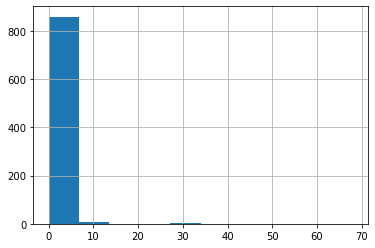

In [11]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count